In [1]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 28.9 MB/s eta 0:00:00


In [2]:
years = list(range(1950, 2024))

In [3]:
import os

for year in range(1950, 2025):
    url = f"https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d{year}_c20250520.csv.gz"
    os.system(f"wget {url}")

In [4]:
import pandas as pd
import glob

files = glob.glob("*.csv.gz")
dfs = [pd.read_csv(f, compression='gzip', low_memory=False) for f in files]
df_all = pd.concat(dfs, ignore_index=True)

In [5]:
df_all

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195509,22,1610,195509,22,1610,NaN,10063685,MISSOURI,29.0,...,0.0,NaN,NaN,38.70,-94.08,NaN,NaN,NaN,NaN,PUB
1,195505,28,800,195505,28,800,NaN,10039446,MICHIGAN,26.0,...,0.0,NaN,NaN,42.12,-85.63,42.42,-85.05,NaN,NaN,PUB
2,195506,10,1500,195506,10,1500,NaN,9976778,ALABAMA,1.0,...,0.0,NaN,NaN,33.00,-86.78,NaN,NaN,NaN,NaN,PUB
3,195507,19,1330,195507,19,1330,NaN,9976779,ALABAMA,1.0,...,0.0,NaN,NaN,30.50,-87.90,NaN,NaN,NaN,NaN,PUB
4,195507,28,1500,195507,28,1500,NaN,9976780,ALABAMA,1.0,...,0.0,NaN,NaN,33.58,-86.78,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879788,200112,21,1200,200112,21,1600,1125523.0,5275366,PUERTO RICO,99.0,...,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,A cold front located north of Puerto Rico in c...,NaN,PDS
1879789,200112,16,2150,200112,17,300,1125688.0,5275500,ARKANSAS,5.0,...,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,"Heavy rains, amounting to between 2 and 4 inch...",NaN,PDS
1879790,200112,22,700,200112,22,2200,1125524.0,5275368,PUERTO RICO,99.0,...,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,A cold front became stationary north of Puerto...,NaN,PDS
1879791,200112,22,700,200112,22,2200,1125524.0,5275369,PUERTO RICO,99.0,...,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,A cold front became stationary north of Puerto...,NaN,PDS


In [6]:
df_floods = df_all[df_all['EVENT_TYPE'].str.contains('Flood', case=False)]
df_floods[df_floods['STATE'] == 'TEXAS']

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
2685,201203,20,6,201203,20,6,60607.0,367726,TEXAS,48.0,...,11.0,SW,VANDERPOOL,29.6300,-99.3300,29.6261,-99.4826,A deep upper level trough of low pressure and ...,Thunderstorms produced heavy rain that caused ...,CSV
2687,201203,20,24,201203,20,24,60607.0,367737,TEXAS,48.0,...,12.0,W,VANDERPOOL,29.6400,-99.5500,29.7334,-99.5712,A deep upper level trough of low pressure and ...,Thunderstorms produced heavy rain that caused ...,CSV
3015,201203,20,30,201203,20,30,60607.0,367739,TEXAS,48.0,...,3.0,SW,MARBLE FALLS,30.5533,-98.2782,30.5392,-98.3033,A deep upper level trough of low pressure and ...,Thunderstorms produced heavy rain that caused ...,CSV
3016,201203,20,32,201203,20,32,60607.0,367740,TEXAS,48.0,...,5.0,NW,BERTRAM,30.7600,-98.0600,30.8035,-98.0973,A deep upper level trough of low pressure and ...,Thunderstorms produced heavy rain that caused ...,CSV
3027,201203,20,530,201203,20,1000,60616.0,361905,TEXAS,48.0,...,2.0,SW,QUITMAN,32.7779,-95.4563,32.7824,-95.4559,A vigorous upper level trough closed off acros...,County Road 2110 was closed due to flooding.,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879497,200112,16,1030,200112,16,1030,1125327.0,5274857,TEXAS,48.0,...,NaN,NaN,CRAWFORD,NaN,NaN,NaN,NaN,A slow moving storm system dropped heavy rain ...,A nine year old boy drowned as he was attempti...,PDS
1879530,200112,16,930,200112,16,930,1125327.0,5274853,TEXAS,48.0,...,NaN,NaN,DALLAS,NaN,NaN,NaN,NaN,A slow moving storm system dropped heavy rain ...,Numerous streets in the city of Dallas were cl...,PDS
1879531,200112,16,936,200112,16,936,1125327.0,5274854,TEXAS,48.0,...,NaN,NaN,QUINLAN,NaN,NaN,NaN,NaN,A slow moving storm system dropped heavy rain ...,Highway 75 at Quinlan was closed due to high w...,PDS
1879555,200112,16,1030,200112,16,1030,1125327.0,5274855,TEXAS,48.0,...,NaN,NaN,CADDO MILLS,NaN,NaN,NaN,NaN,A slow moving storm system dropped heavy rain ...,Secondary roads around Caddo Mills that cross ...,PDS


In [7]:
df_floods[df_floods['STATE'] == 'TEXAS'].columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np
import xarray as xr

# Filter for Texas
df_tx = df_floods[df_floods['STATE'] == 'TEXAS'].copy()

# Parse time and drop rows with missing lat/lon
df_tx['YEAR'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME'], errors='coerce').dt.year
df_tx = df_tx.dropna(subset=['BEGIN_LAT', 'BEGIN_LON', 'YEAR'])

# Round lat/lon to 0.25° grid
df_tx['lat_bin'] = (df_tx['BEGIN_LAT'] // 0.25) * 0.25
df_tx['lon_bin'] = (df_tx['BEGIN_LON'] // 0.25) * 0.25

# Group by grid and year, count events
event_counts = df_tx.groupby(['YEAR', 'lat_bin', 'lon_bin']).size().reset_index(name='event_count')

# Get unique coordinates and years
years = np.sort(event_counts['YEAR'].unique())
lats = np.sort(event_counts['lat_bin'].unique())
lons = np.sort(event_counts['lon_bin'].unique())

# Initialize empty 3D array
grid = np.zeros((len(years), len(lats), len(lons)))

# Fill the grid
lat_idx = {lat: i for i, lat in enumerate(lats)}
lon_idx = {lon: i for i, lon in enumerate(lons)}
year_idx = {year: i for i, year in enumerate(years)}

for _, row in event_counts.iterrows():
    y, lat, lon, count = int(row['YEAR']), row['lat_bin'], row['lon_bin'], row['event_count']
    grid[year_idx[y], lat_idx[lat], lon_idx[lon]] = count

# Convert to xarray
ds = xr.Dataset(
    {
        'flood_event_count': (['year', 'lat', 'lon'], grid)
    },
    coords={
        'year': years,
        'lat': lats,
        'lon': lons
    }
)

ds

/tmp/ipython-input-8-3655485010.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tx['YEAR'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME'], errors='coerce').dt.year
/tmp/ipython-input-8-3655485010.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx['lat_bin'] = (df_tx['BEGIN_LAT'] // 0.25) * 0.25
/tmp/ipython-input-8-3655485010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

<xarray.Dataset> Size: 417kB
Dimensions:            (year: 22, lat: 43, lon: 55)
Coordinates:
  * year               (year) int32 88B 2001 2003 2004 2005 ... 2022 2023 2024
  * lat                (lat) float64 344B 25.75 26.0 26.25 ... 35.75 36.0 36.25
  * lon                (lon) float64 440B -106.8 -106.5 -106.2 ... -93.5 -93.25
Data variables:
    flood_event_count  (year, lat, lon) float64 416kB 0.0 0.0 0.0 ... 0.0 0.0

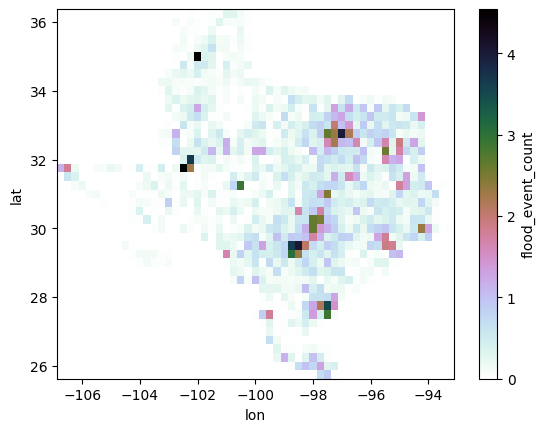

In [9]:
ds.flood_event_count.mean(dim='year').plot(cmap='cubehelix_r')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


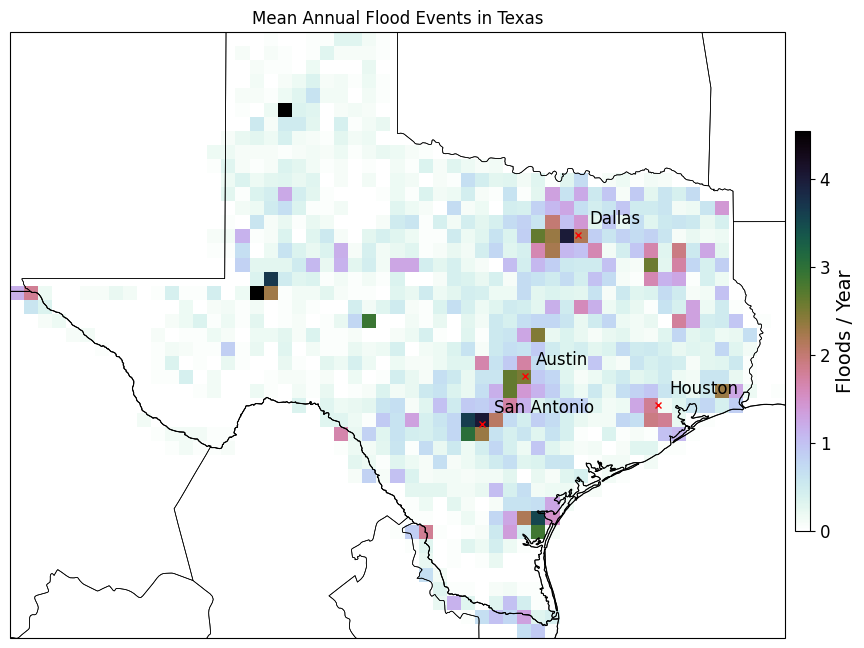

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Coordinates for cities
cities = {
    'Austin': (30.2672, -97.7431),
    'Dallas': (32.7767, -96.7970),
    'San Antonio': (29.4241, -98.4936),
    'Houston': (29.7604, -95.3698)
}

# Compute mean across years
mean_floods = ds.flood_event_count.mean(dim='year')

# Create figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data and suppress default colorbar
im = mean_floods.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='cubehelix_r',
    add_colorbar=False
)

# Manually add smaller colorbar
cax = fig.add_axes([0.91, 0.25, 0.015, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Floods / Year', fontsize=14)

cbar.ax.tick_params(labelsize=12)

# Add geographic features
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.coastlines(resolution='10m', linewidth=0.8)

# Plot and label each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, 'x', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.2, lat + 0.2, city, fontsize=12, color='black', transform=ccrs.PlateCarree())

# Title
ax.set_title('Mean Annual Flood Events in Texas')
plt.show()

In [11]:
df_all['EVENT_TYPE'].unique()

array(['Hail', 'Tornado', 'Thunderstorm Wind', 'High Wind',
       'Winter Storm', 'Heavy Snow', 'Drought', 'Lightning',
       'Winter Weather', 'Marine Thunderstorm Wind', 'High Surf',
       'Waterspout', 'Wildfire', 'Strong Wind', 'Flash Flood',
       'Heavy Rain', 'Coastal Flood', 'Dense Fog', 'Flood', 'Blizzard',
       'Ice Storm', 'Astronomical Low Tide', 'Extreme Cold/Wind Chill',
       'Funnel Cloud', 'Dust Storm', 'Cold/Wind Chill', 'Frost/Freeze',
       'Sneakerwave', 'Excessive Heat', 'Lake-Effect Snow', 'Seiche',
       'Marine High Wind', 'Rip Current', 'Tropical Storm',
       'Freezing Fog', 'Avalanche', 'Heat', 'Marine Strong Wind',
       'Debris Flow', 'Marine Hail', 'Dust Devil', 'Tropical Depression',
       'Hurricane (Typhoon)', 'Storm Surge/Tide', 'Dense Smoke', 'Sleet',
       'Marine Tropical Storm', 'Marine Dense Fog',
       'Marine Hurricane/Typhoon', 'Lakeshore Flood', 'Volcanic Ashfall',
       'Marine Lightning', 'Marine Tropical Depression', 'Tsunam

In [12]:
df_floods.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

<Axes: >

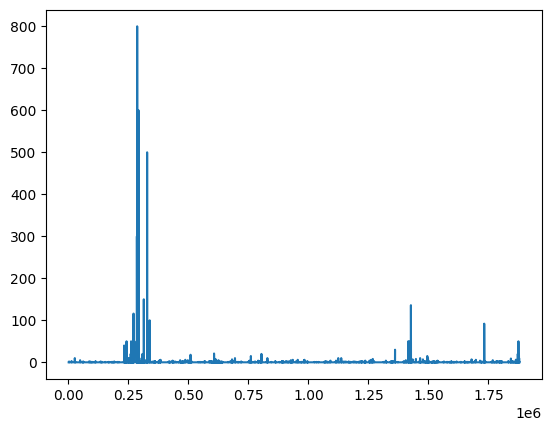

In [13]:
df_floods.INJURIES_DIRECT.plot()

<Axes: >

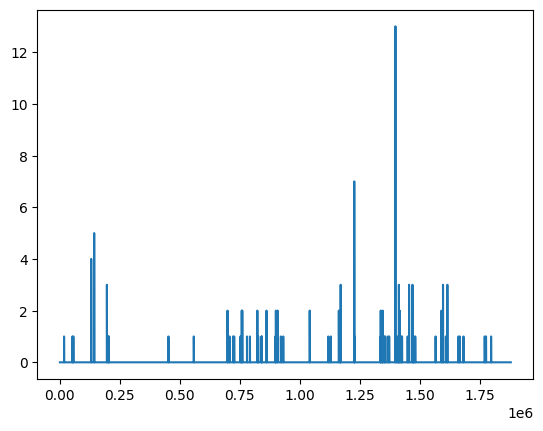

In [14]:
df_floods.INJURIES_INDIRECT.plot()

<Axes: >

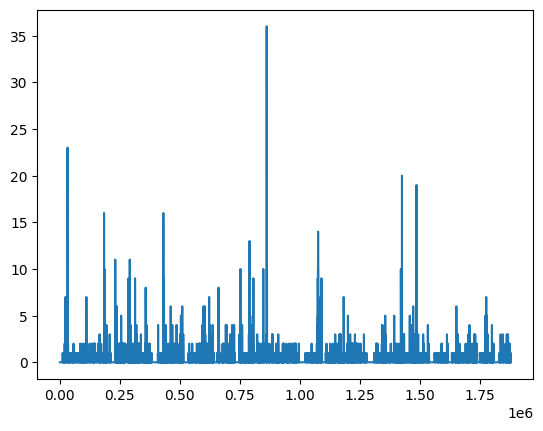

In [15]:
df_floods.DEATHS_DIRECT.plot()

<Axes: >

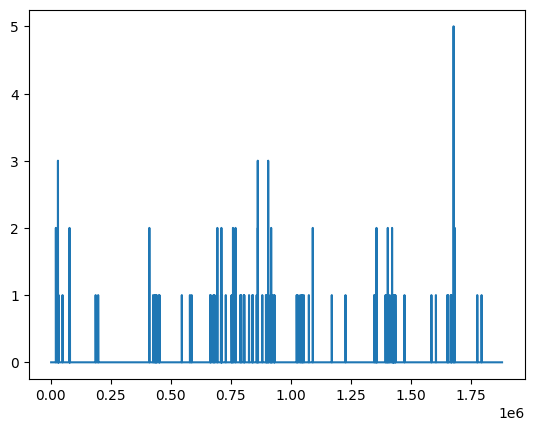

In [16]:
df_floods.DEATHS_INDIRECT.plot()

In [17]:
df_floods.DAMAGE_PROPERTY.unique()

array(['0.00K', nan, '25.00K', ..., '548K', '385K', '47M'], dtype=object)

In [18]:
df_floods.DAMAGE_CROPS.unique()

array(['0.00K', nan, '500.00K', '50.00K', '10.00K', '1.00K', '200.00K',
       '0.50K', '1.00M', '250.00K', '4000.00K', '750.00K', '2.00K',
       '3.00K', '5.00K', '100.00K', '20.00K', '25.00K', '15.00K',
       '1000.00K', '700.00K', '0.01K', '150.00K', '0.10K', '22.00K',
       '392.00K', '1.10K', '0.40K', '157.00K', '151.00K', '189.00K',
       '482.00K', '39.00K', '125.00K', '162.00K', '220.00K', '1.20M',
       '37.00K', '466.00K', '30.00K', '190.00K', '74.00K', '281.00K',
       '121.00K', '17.00K', '800.00K', '0.20K', '62.00K', '57.00K',
       '54.00K', '69.00K', '180.00K', '140.00K', '73.00K', '113.00K',
       '45.00K', '305.00K', '49.00K', '175.00K', '360.00K', '120.00K',
       '905.00K', '26.00K', '0K', '15K', '20K', '1K', '250K', '50K', '0',
       '5K', '2M', '30K', '5M', '10K', '1M', '25K', '200K', '1.21M', '2K',
       '3K', '0M', '.25M', '.1M', '100K', '75K', '2.9M', '10.5M', '500K',
       '.15M', '40K', '18K', '400K', '4M', '1.7M', '.5K', '15M', '80K',
       '35K'

In [19]:
df_floods.MAGNITUDE.unique()

array([   nan,  75.  ,  70.  , 300.  , 400.  , 800.  ,   0.  ,  35.  ,
         3.5 ,   5.  ,   7.  ,   4.  ,   6.  ,   3.6 ,   2.5 ,   1.5 ,
         1.7 ,   1.3 ,   4.5 ,  50.  ,  55.  , 100.  ,  45.  ,   1.  ,
        12.  ,   8.  ,   2.  ,   3.15,  88.  ,   3.  ,  60.  ,   2.75,
         5.5 , 275.  ])

In [20]:
df_floods.EPISODE_NARRATIVE.unique()

array(['Heavy rainfall resulted in a flash flood across a section of Highway 133.',
       'Large long period northwest swells associated with the broad circulation of Hurricane Sandy affected the local Atlantic waters and the Caribbean passages. Large breaking waves of 15 to 20 feet produced coastal flooding mainly in low lying and exposed areas.',
       'Widespread and persistent heavy rainfall along a stationary frontal boundary stretching across northeastern Oklahoma and southeastern Kansas resulted in five to eight inch rainfalls across the region from April 29th through May 1st. This heavy rainfall resulted in moderate flooding of the Neosho River near Commerce.',
       ...,
       'Emergency Managers reported that Rio La Vaja in Ciales  went out of its banks flooding nearby areas.',
       'Heavy rains caused urban flooding at low and poor drainage areas in parts of Carolina, Loiza, San Juan and Guaynabo. Puerto Nuevo River went out of its banks in Guaynabo.',
       'A spotte

In [21]:
df_floods.EPISODE_NARRATIVE.shape

(170875,)

In [22]:
ds.to_netcdf('floods.nc')

# Winds

In [23]:
# Define keywords for wind-related events
wind_keywords = ['Wind', 'Hurricane', 'Typhoon', 'Tropical Storm', 'Tropical Depression',
                 'Waterspout', 'Funnel Cloud', 'Dust Storm']

# Filter for wind-related events
df_wind = df_all[df_all['EVENT_TYPE'].str.contains('|'.join(wind_keywords), case=False)]

# Further filter for events in Texas
df_wind_texas = df_wind[df_wind['STATE'] == 'TEXAS']

In [24]:
df_wind_texas

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
163,195506,16,1700,195506,16,1700,NaN,10121899,TEXAS,48.0,...,0.0,NaN,NaN,30.50000,-99.78000,NaN,NaN,NaN,NaN,PUB
167,195506,18,200,195506,18,200,NaN,10121903,TEXAS,48.0,...,0.0,NaN,NaN,34.38000,-100.18000,NaN,NaN,NaN,NaN,PUB
168,195506,18,245,195506,18,245,NaN,10121904,TEXAS,48.0,...,0.0,NaN,NaN,32.78000,-97.08000,NaN,NaN,NaN,NaN,PUB
169,195506,18,330,195506,18,330,NaN,10121905,TEXAS,48.0,...,0.0,NaN,NaN,32.28000,-97.40000,NaN,NaN,NaN,NaN,PUB
280,195510,4,1600,195510,4,1600,NaN,10118818,TEXAS,48.0,...,0.0,NaN,NaN,33.70000,-101.18000,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878641,200110,12,2100,200110,12,2100,1124377.0,5271577,TEXAS,48.0,...,5.0,S,LITTLE ELM,31.75000,-97.16667,31.80000,-97.08333,Showers and thunderstorms developed across nor...,At least 60 homes were damaged by thunderstorm...,PDS
1878681,200110,12,2155,200110,12,2205,1123806.0,5269724,TEXAS,48.0,...,10.0,NW,NEW BRAUNFELS,29.80000,-98.25000,29.80000,-98.25000,NaN,An off-duty NWS employee reported trees blown ...,PDS
1878682,200110,12,2201,200110,12,2210,1123806.0,5269725,TEXAS,48.0,...,NaN,NaN,CEDAR PARK,30.50000,-97.81667,30.50000,-97.81667,NaN,NaN,PDS
1878683,200110,12,2227,200110,12,2240,1123806.0,5269726,TEXAS,48.0,...,NaN,NaN,PFLUGERVILLE,30.43333,-97.61667,30.43333,-97.61667,NaN,NaN,PDS


In [25]:
import pandas as pd
import numpy as np
import xarray as xr

# Filter for Texas
df_tx = df_wind_texas[df_wind_texas['STATE'] == 'TEXAS'].copy()

# Parse time and drop rows with missing lat/lon
df_wind_texas['YEAR'] = pd.to_datetime(df_wind_texas['BEGIN_DATE_TIME'], errors='coerce').dt.year
df_wind_texas = df_wind_texas.dropna(subset=['BEGIN_LAT', 'BEGIN_LON', 'YEAR'])

# Round lat/lon to 0.25° grid
df_wind_texas['lat_bin'] = (df_wind_texas['BEGIN_LAT'] // 0.25) * 0.25
df_wind_texas['lon_bin'] = (df_wind_texas['BEGIN_LON'] // 0.25) * 0.25

# Group by grid and year, count events
event_counts = df_wind_texas.groupby(['YEAR', 'lat_bin', 'lon_bin']).size().reset_index(name='event_count')

# Get unique coordinates and years
years = np.sort(event_counts['YEAR'].unique())
lats = np.sort(event_counts['lat_bin'].unique())
lons = np.sort(event_counts['lon_bin'].unique())

# Initialize empty 3D array
grid = np.zeros((len(years), len(lats), len(lons)))

# Fill the grid
lat_idx = {lat: i for i, lat in enumerate(lats)}
lon_idx = {lon: i for i, lon in enumerate(lons)}
year_idx = {year: i for i, year in enumerate(years)}

for _, row in event_counts.iterrows():
    y, lat, lon, count = int(row['YEAR']), row['lat_bin'], row['lon_bin'], row['event_count']
    grid[year_idx[y], lat_idx[lat], lon_idx[lon]] = count

# Convert to xarray
ds = xr.Dataset(
    {
        'wind_event_count': (['year', 'lat', 'lon'], grid)
    },
    coords={
        'year': years,
        'lat': lats,
        'lon': lons
    }
)
ds

/tmp/ipython-input-25-529460873.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_wind_texas['YEAR'] = pd.to_datetime(df_wind_texas['BEGIN_DATE_TIME'], errors='coerce').dt.year
/tmp/ipython-input-25-529460873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_texas['YEAR'] = pd.to_datetime(df_wind_texas['BEGIN_DATE_TIME'], errors='coerce').dt.year
/tmp/ipython-input-25-529460873.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

<xarray.Dataset> Size: 1MB
Dimensions:           (year: 66, lat: 45, lon: 54)
Coordinates:
  * year              (year) int32 264B 1975 1976 1977 1978 ... 2072 2073 2074
  * lat               (lat) float64 360B 24.5 25.75 26.0 ... 36.0 36.25 36.5
  * lon               (lon) float64 432B -106.8 -106.5 -106.2 ... -93.75 -82.0
Data variables:
    wind_event_count  (year, lat, lon) float64 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0

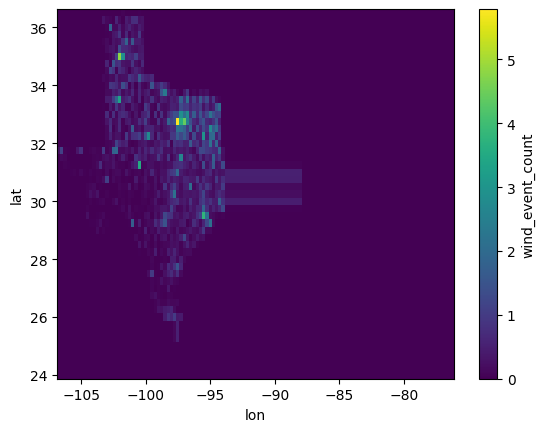

In [26]:
ds.mean(dim='year').wind_event_count.plot()

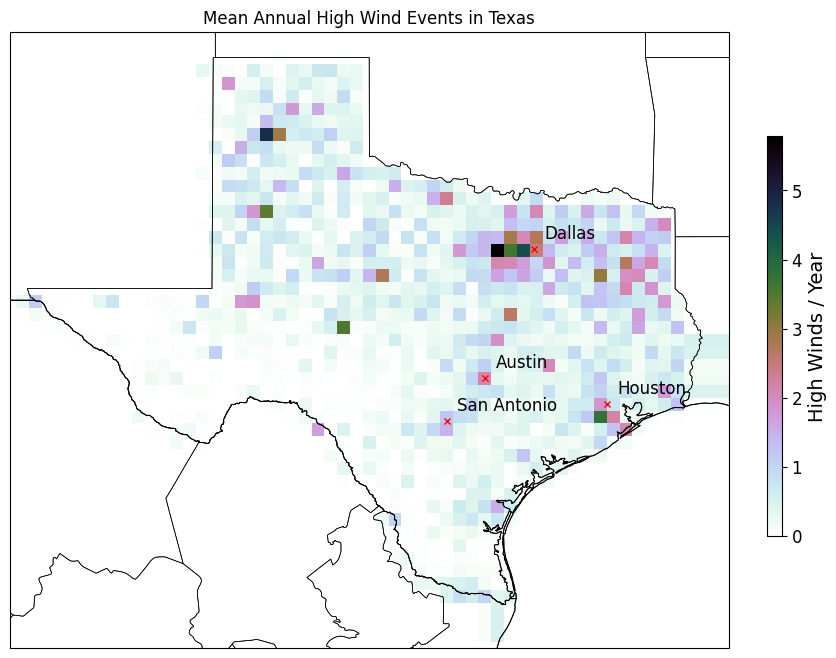

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Coordinates for cities
cities = {
    'Austin': (30.2672, -97.7431),
    'Dallas': (32.7767, -96.7970),
    'San Antonio': (29.4241, -98.4936),
    'Houston': (29.7604, -95.3698)
}

# Compute mean across years
mean_floods = ds.wind_event_count.mean(dim='year')

# Create figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data and suppress default colorbar
im = mean_floods.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='cubehelix_r',
    add_colorbar=False
)

# Manually add smaller colorbar
cax = fig.add_axes([0.91, 0.25, 0.015, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('High Winds / Year', fontsize=14)

cbar.ax.tick_params(labelsize=12)

# Add geographic features
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.coastlines(resolution='10m', linewidth=0.8)

# Plot and label each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, 'x', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.2, lat + 0.2, city, fontsize=12, color='black', transform=ccrs.PlateCarree())
# Set map extent to Texas [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-107, -93, 25, 37], crs=ccrs.PlateCarree())

# Title
ax.set_title('Mean Annual High Wind Events in Texas')
plt.show()

In [30]:
ds.to_netcdf('winds.nc')